In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from joblib import dump

from importlib import reload
import custom_scripts
reload(custom_scripts)
from custom_scripts import add_all_TA, get_full_stock_data, check_model_for_new_ticker

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Get the historic price data for July Corn from YahooFinance and add techincal indicators

In [2]:
# Get the 'stock' data for July Corn
ticker="ZC=F"
full_stock_data = get_full_stock_data(ticker=ticker, start_date="2020-01-01", end_date="2022-12-31")

# Remove the direct price data from the dataset we will train on.
X = full_stock_data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'others_dr', 'others_dlr','others_cr'], axis=1)

# Set the close price as our "goal" dataset. E.g, use X to try and predict y
y = full_stock_data['Close']

### The following cell is the entirety of the "Machine Learning"

In [3]:
# Split the data into 80% training data, and 20% testing data. E.g 2020-01-01 to ~ 2022-06-01 will be train, J
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initilize the model and fit (train) the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make the Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)

### Blue line from Jan. 2020 to Jan. 2023 is the actual price, orange dotted line from roughly June 2022 to present is predicted

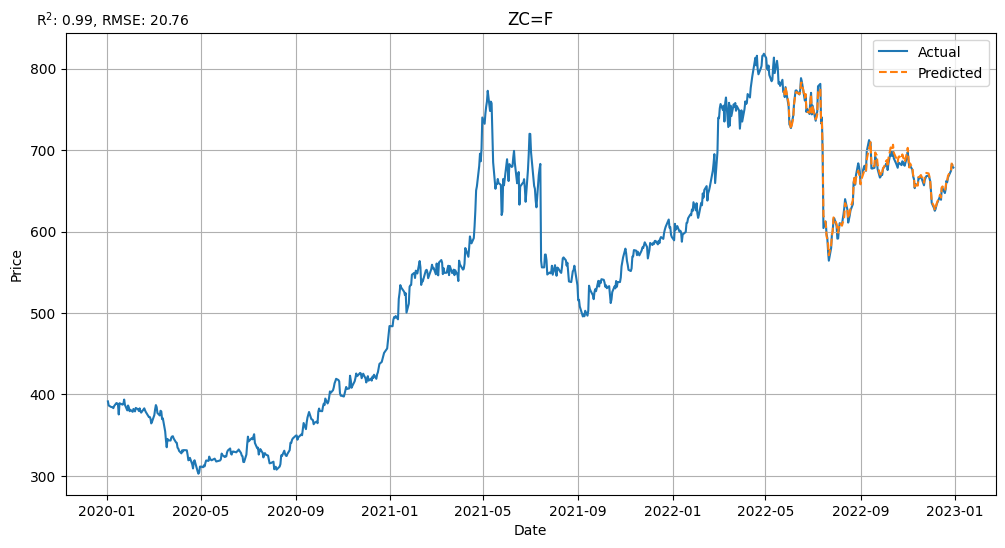

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(y_train.index, y_train.values, c='#1f77b4')
ax.plot(y_test.index, y_test.values, label='Actual', c='#1f77b4', zorder=-5)
ax.plot(y_test.index, y_pred, label='Predicted', ls='--', c='#ff7f0e')

ax.legend()
ax.set_title("{}".format(ticker))


ax.text(0.05, 1.05, r'R$^2$' + ': {:,.2f}, RMSE: {:.2f}'.format(r2, rmse), transform=ax.transAxes, horizontalalignment='center', verticalalignment='top')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid()

### Clearly pretty good at predicting the price, R2 and RMSE look great, but most likely overfit. Can test other securities and see how it does.

### Starting with Wheat Futures, assuming that price movements between Corn and Wheat would be at least somewhat connected. Expect a decent result for this, but obviously no where near good enough to trade off of

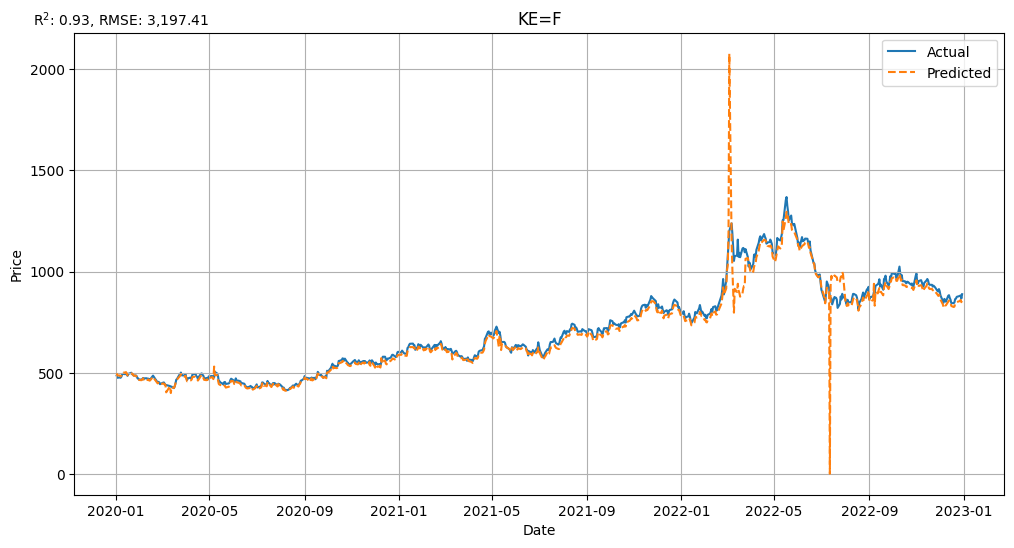

In [5]:
check_model_for_new_ticker(model, "KE=F")

### Not bad, but can see those huge spikes. Trying the same model now on a security that should have little to no correlation (Lockheed), expecting horrible results

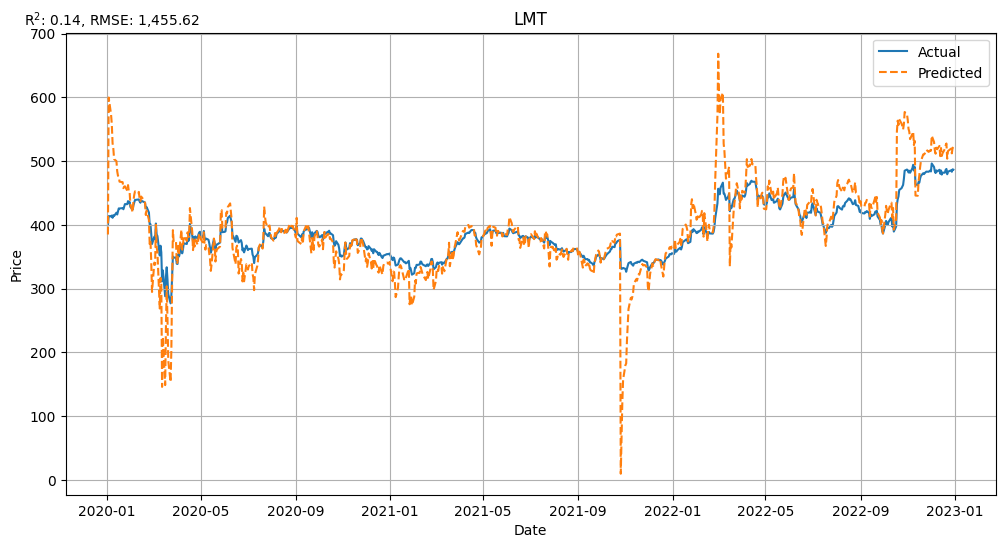

In [6]:
check_model_for_new_ticker(model, "LMT")

### Suprisingly not too bad, actually a better RMSE than we got for wheat, but not good R2 at all. Probably just lucky along with less price volatility. Trying Boeing instead:

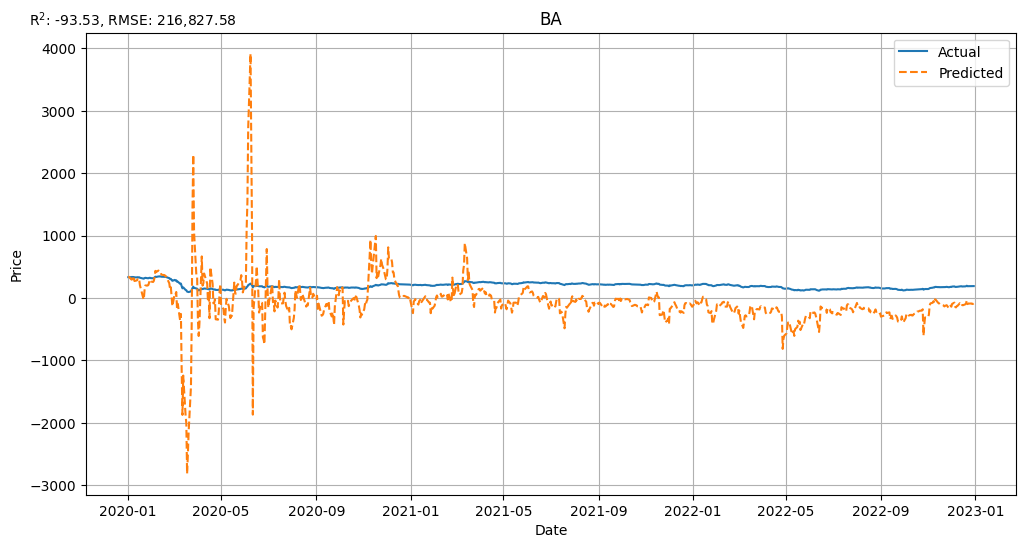

In [7]:
check_model_for_new_ticker(model, "BA")

### Useless

In [8]:
# Save the model
dump(model, 'initial_model_trained_on_corn.joblib')

# Print the parameters for each column
parameters = model.coef_
print(parameters)

[-3.77207846e-06  2.34035438e-07  4.20095296e-07 -2.51210277e+00
  4.66070267e-06  1.00564257e-08 -1.71748458e-08  1.64505635e-05
 -7.15171476e-02 -1.41321664e-02  2.57392449e-02  1.82835746e-01
  2.84914223e-01  8.07570514e-02 -4.20599311e-01  9.85122502e+00
  6.82021569e-01  8.54073661e-01 -2.06763943e-01  2.47998162e-03
 -4.16007900e-01  2.52532984e-01  3.33930313e+00 -9.06994217e-01
  3.50691197e-01  1.19706029e-01 -4.11406380e-02  3.92826060e-02
  3.48093130e-01  6.34988770e+00 -7.52889381e-01 -9.62611041e-01
  2.62010783e+00 -4.67681416e-01  3.08778929e+00  1.25200291e-01
 -9.38490280e-02  1.78062334e+00 -8.39484580e-01  4.51357448e-01
 -2.28570771e+00  2.73706516e+00 -9.30697968e-02  6.46009740e-01
  2.24546650e-02 -1.06221263e-02 -1.73555551e-04 -1.04484658e-02
  3.22277210e-02  2.60957919e-02  2.91617871e-02  7.15760164e-02
  7.89341123e-03  5.18771195e-02 -1.92849975e-02  1.46402717e-01
 -8.78038008e-03 -3.44757618e-02  5.52830874e-02 -1.63070825e-02
 -1.30312958e-02 -3.27572